In [1]:
#21BCE9243
#SRAVYA ELURI
#VGG19 Model
import numpy as np
import pandas as pd
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

In [2]:
!pip install imutils

from imutils import paths
import matplotlib.pyplot as plt
import argparse
import os
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import VGG19
from tensorflow.keras.layers import AveragePooling2D
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Input
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.utils import to_categorical
from sklearn.preprocessing import LabelBinarizer
from sklearn.model_selection import train_test_split

dataset = "/content/sample_data/covid19-chest-xray-image-dataset"


In [3]:
args={}
args["dataset"]=dataset

In [4]:
import numpy as np
import cv2
iPaths = list(paths.list_images(args["dataset"]))  #image paths
data = []
labels = []
for iPath in iPaths:
    label = iPath.split(os.path.sep)[-2]   #split the image paths
    image = cv2.imread(iPath)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB) #Convert images into RGB Channel
    image = cv2.resize(image, (224, 224))  #Resizing the images
    data.append(image)
    labels.append(label)
data = np.array(data) / 255.0
labels = np.array(labels)

In [5]:
import os
Data_Dir = "/content/sample_data/covid19-chest-xray-image-dataset/dataset"

In [6]:
if os.path.exists(Data_Dir):
    print(os.listdir(Data_Dir))
else:
    print("Data directory does not exist!")

['.ipynb_checkpoints', 'normal', 'covid']


In [7]:
import os

In [8]:
Data_Dir = "/content/sample_data/covid19-chest-xray-image-dataset/dataset"
Cimages = os.listdir(os.path.join(Data_Dir, "covid"))
Nimages = os.listdir(os.path.join(Data_Dir, "normal"))

Normal Chest X-ray Vs Covid-19 Chest X-ray


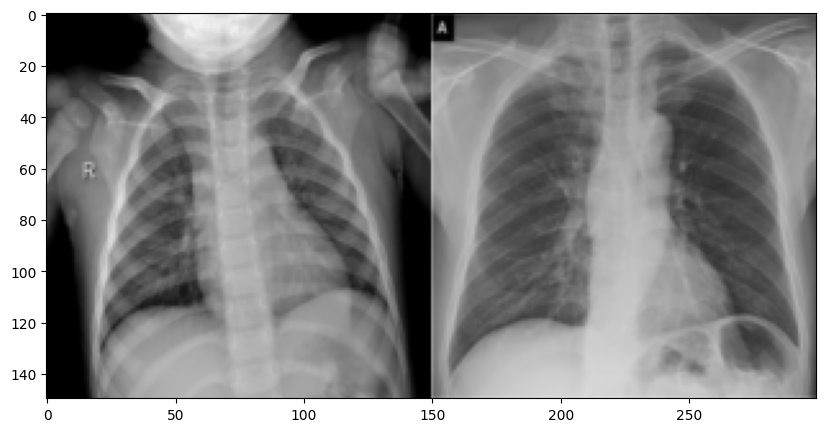

Normal Chest X-ray Vs Covid-19 Chest X-ray


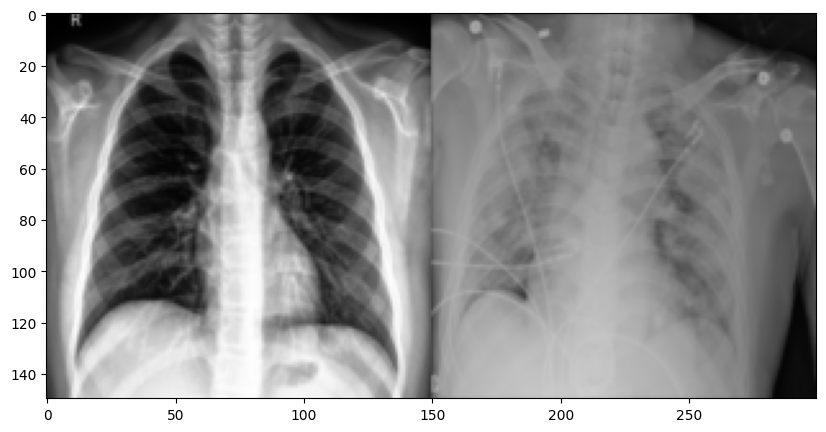

Normal Chest X-ray Vs Covid-19 Chest X-ray


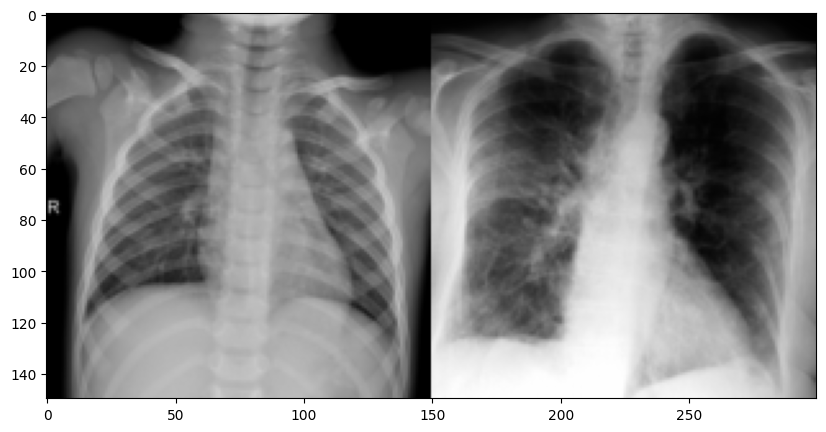

Normal Chest X-ray Vs Covid-19 Chest X-ray


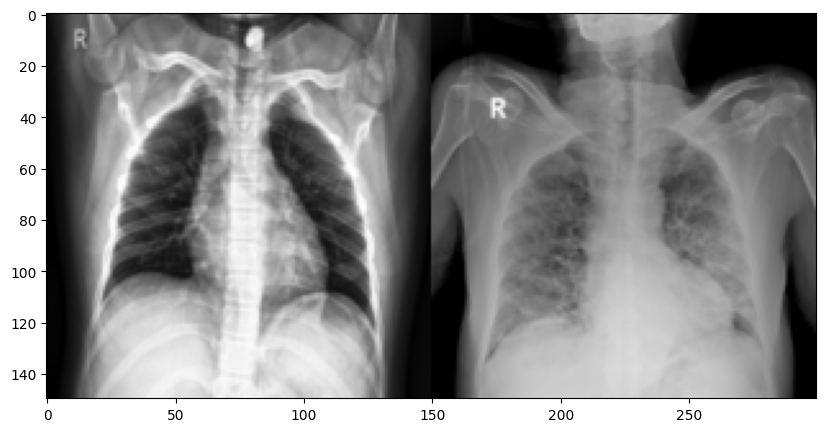

Normal Chest X-ray Vs Covid-19 Chest X-ray


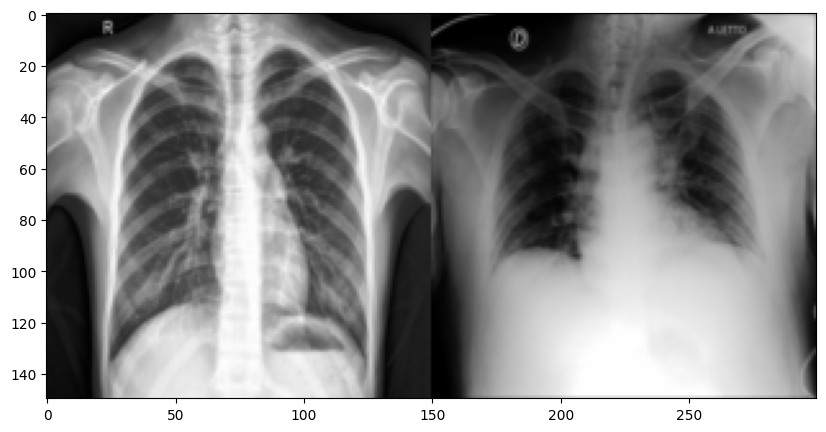

In [9]:
import matplotlib.pyplot as plt
import cv2
import skimage
from skimage.transform import resize
import numpy as np

def plotter(i):
    try:
        normal = cv2.imread(Data_Dir + "/normal/" + Nimages[i])
        if normal is None:
            raise ValueError("Failed to read normal image:", Nimages[i])
        normal = skimage.transform.resize(normal, (150, 150, 3))

        coronavirus = cv2.imread(Data_Dir + "/covid/" + Cimages[i])
        if coronavirus is None:
            raise ValueError("Failed to read coronavirus image:", Cimages[i])
        coronavirus = skimage.transform.resize(coronavirus, (150, 150, 3), mode='reflect')

        pair = np.concatenate((normal, coronavirus), axis=1)

        print("Normal Chest X-ray Vs Covid-19 Chest X-ray")
        plt.figure(figsize=(10, 5))
        plt.imshow(pair)
        plt.show()

    except Exception as e:
        print("Error:", str(e))

for i in range(0, 5):
    plotter(i)

In [10]:
LB = LabelBinarizer()
labels = LB.fit_transform(labels)
labels = to_categorical(labels); print(labels)
(X_train, X_test, Y_train, Y_test) = train_test_split(data, labels,
    test_size=0.20, stratify=labels, random_state=42)
trainAug = ImageDataGenerator(
    rotation_range=15,
    fill_mode="nearest")

[[0. 1.]
 [0. 1.]
 [0. 1.]
 ...
 [1. 0.]
 [1. 0.]
 [1. 0.]]


In [11]:
from tensorflow.keras.applications import VGG19
from tensorflow.keras.layers import AveragePooling2D, Flatten, Dense, Dropout, Input
from tensorflow.keras.models import Model

base_model = VGG19(weights="imagenet", include_top=False, input_tensor=Input(shape=(224, 224, 3)))  # Change: VGG19 instead of VGG16
model = base_model.output
model = AveragePooling2D(pool_size=(4, 4))(model)
model = Flatten(name="flatten")(model)
model = Dense(64, activation="relu")(model)
model = Dropout(0.5)(model)
model = Dense(2, activation="softmax")(model)

full_model = Model(inputs=base_model.input, outputs=model)
for layer in full_model.layers:
    layer.trainable = False
full_model.compile(
        loss='categorical_crossentropy',
        optimizer='adam',
        metrics=['accuracy']
)

80134624/80134624 [==============================] - 0s 0us/step


In [12]:
X_train.shape,X_test.shape,Y_train.shape,Y_test.shape

((458, 224, 224, 3), (115, 224, 224, 3), (458, 2), (115, 2))

In [13]:
W_grid = 4 #width
L_grid = 4 #lenth
fig, axes = plt.subplots(L_grid, W_grid, figsize = (25, 25)) #subplots
axes = axes.ravel()
n_training = len(X_train)
for i in np.arange(0, L_grid * W_grid):
    index = np.random.randint(0, n_training) # pick a random number
    axes[i].imshow(X_train[index])
    axes[i].set_title(Y_train[index])
    axes[i].axis('off')

plt.subplots_adjust(hspace = 0.4)

Output hidden; open in https://colab.research.google.com to view.

In [14]:
train_aug = ImageDataGenerator(
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    horizontal_flip=True
)
history = full_model.fit(train_aug.flow(X_train, Y_train, batch_size=32),
                    validation_data=(X_test, Y_test),
                    validation_steps=len(X_test) / 32,
                    steps_per_epoch=len(X_train) / 32,
                    epochs=100)

Epoch 1/100
14/14 [==============================] - 22s 719ms/step - loss: 0.9500 - accuracy: 0.4803 - val_loss: 0.8269 - val_accuracy: 0.4957
Epoch 2/100
14/14 [==============================] - 7s 468ms/step - loss: 0.9551 - accuracy: 0.4825 - val_loss: 0.8269 - val_accuracy: 0.4957
Epoch 3/100
14/14 [==============================] - 6s 398ms/step - loss: 0.9172 - accuracy: 0.5109 - val_loss: 0.8269 - val_accuracy: 0.4957
Epoch 4/100
14/14 [==============================] - 7s 467ms/step - loss: 0.9817 - accuracy: 0.4934 - val_loss: 0.8269 - val_accuracy: 0.4957
Epoch 5/100
14/14 [==============================] - 6s 408ms/step - loss: 0.9392 - accuracy: 0.4782 - val_loss: 0.8269 - val_accuracy: 0.4957
Epoch 6/100
14/14 [==============================] - 7s 452ms/step - loss: 0.9448 - accuracy: 0.4760 - val_loss: 0.8269 - val_accuracy: 0.4957
Epoch 7/100
14/14 [==============================] - 6s 410ms/step - loss: 0.9201 - accuracy: 0.4934 - val_loss: 0.8269 - val_accuracy: 0.495

In [15]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


4/4 [==============================] - 1s 162ms/step


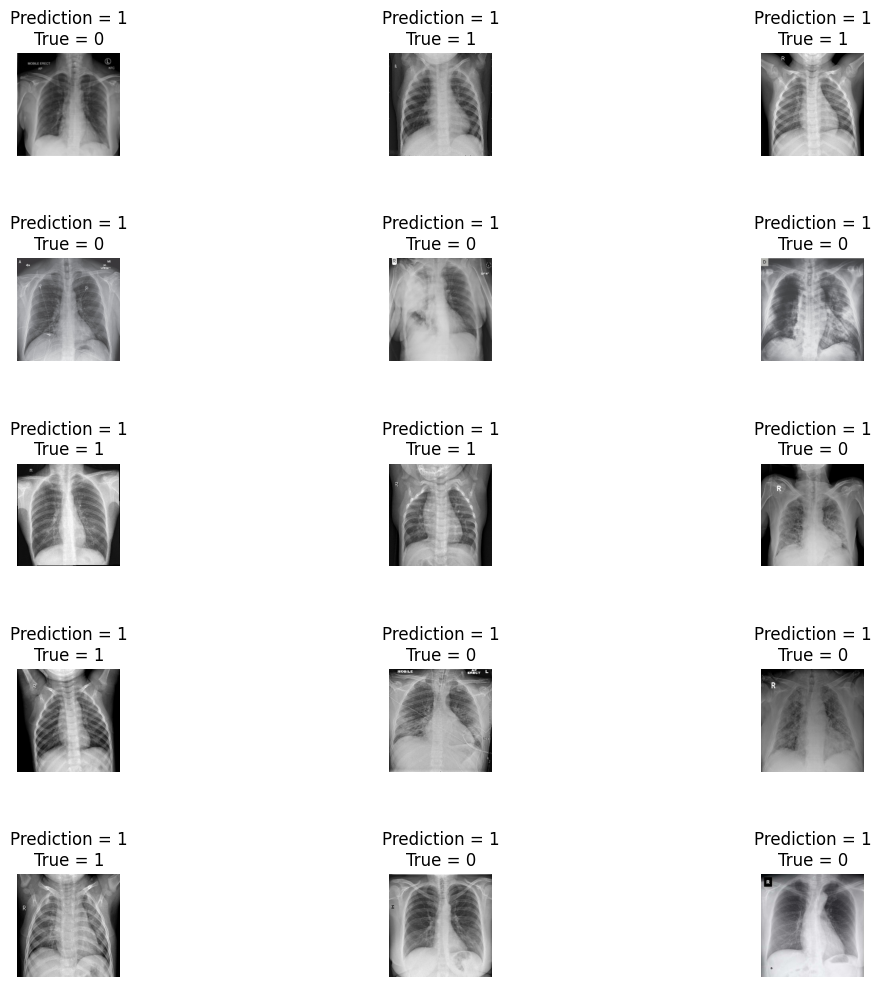

In [17]:
L = 5
W = 3
fig, axes = plt.subplots(L, W, figsize=(12, 12))
axes = axes.ravel()
y_pred = full_model.predict(X_test, batch_size=32)
num_samples = min(len(X_test), L * W)  # Use the minimum of L * W and number of samples in X_test
for i in range(num_samples):
    axes[i].imshow(X_test[i])
    axes[i].set_title('Prediction = {}\nTrue = {}'.format(y_pred.argmax(axis=1)[i], Y_test.argmax(axis=1)[i]))
    axes[i].axis('off')
plt.subplots_adjust(wspace=1, hspace=1)

In [19]:
from sklearn.metrics import classification_report
y_pred = full_model.predict(X_test, batch_size=32)
y_pred = np.argmax(y_pred, axis=1)
print(classification_report(Y_test.argmax(axis=1), y_pred,target_names=LB.classes_))


4/4 [==============================] - 1s 153ms/step
              precision    recall  f1-score   support

       covid       0.00      0.00      0.00        58
      normal       0.50      1.00      0.66        57

    accuracy                           0.50       115
   macro avg       0.25      0.50      0.33       115
weighted avg       0.25      0.50      0.33       115



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [20]:
from sklearn.metrics import accuracy_score
accuracy_score(Y_test.argmax(axis=1),y_pred)

0.4956521739130435

In [21]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(Y_test.argmax(axis=1), y_pred)
total = sum(sum(cm))
acc = (cm[0, 0] + cm[1, 1]) / total
sensitivity = cm[0, 0] / (cm[0, 0] + cm[0, 1])
specificity = cm[1, 1] / (cm[1, 0] + cm[1, 1])
print(cm)
print("acc: {:.4f}".format(acc))
print("sensitivity: {:.4f}".format(sensitivity))
print("specificity: {:.4f}".format(specificity))

[[ 0 58]
 [ 0 57]]
acc: 0.4957
sensitivity: 0.0000
specificity: 1.0000


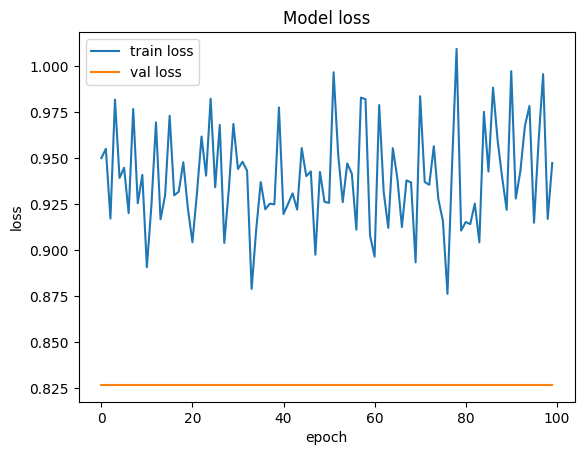

In [27]:
import matplotlib.pyplot as plt

plt.plot(history.history['loss'], label='train loss')
plt.plot(history.history['val_loss'], label='val loss')
plt.title('Model loss')
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend()
plt.savefig('LossVal_loss')  # Save the plot before showing it
plt.show()


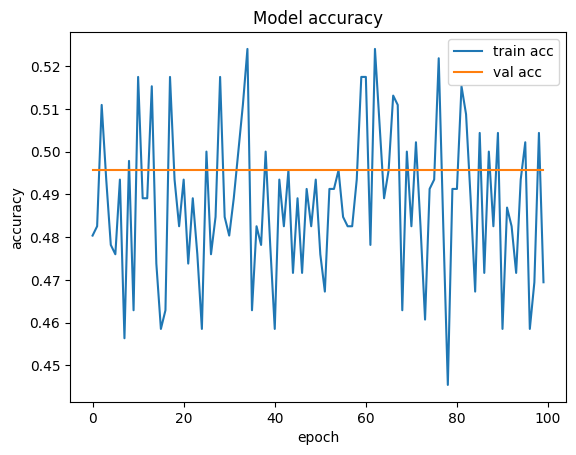

In [28]:
# plot the accuracy
plt.plot(history.history['accuracy'], label='train acc')
plt.plot(history.history['val_accuracy'], label='val acc')
plt.title('Model accuracy')
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.legend()
plt.show()

In [29]:
full_model.save('Covid_model.h5')

1/1 [==============================] - 1s 766ms/step
Prediction: Corona


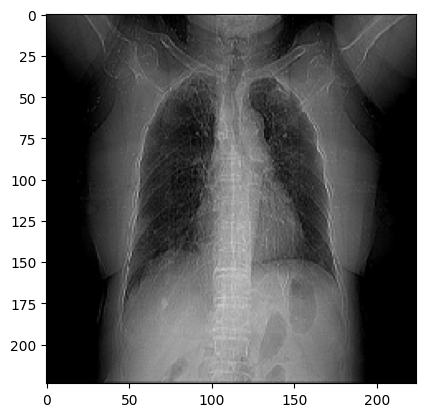

In [30]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

model = tf.keras.models.load_model('Covid_model.h5')
from keras.applications.vgg19 import preprocess_input

img = tf.keras.preprocessing.image.load_img('/content/sample_data/covid19-chest-xray-image-dataset/dataset/covid/ciaa199.pdf-001-a.png', target_size=(224, 224))
imgplot = plt.imshow(img)
x = tf.keras.preprocessing.image.img_to_array(img)
x = np.expand_dims(x, axis=0)
img_data = preprocess_input(x)

classes = model.predict(img_data)
New_pred = np.argmax(classes, axis=1)
if New_pred == [1]:
    print('Prediction: Normal')
else:
    print('Prediction: Corona')

1/1 [==============================] - 0s 163ms/step
Prediction: Normal


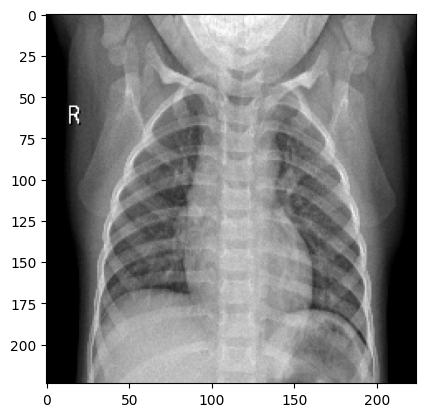

In [31]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

model = tf.keras.models.load_model('Covid_model.h5')
from keras.applications.vgg19 import preprocess_input

img = tf.keras.preprocessing.image.load_img('/content/sample_data/covid19-chest-xray-image-dataset/dataset/normal/IM-0676-0001.jpeg.jpg', target_size=(224, 224))
imgplot = plt.imshow(img)
x = tf.keras.preprocessing.image.img_to_array(img)
x = np.expand_dims(x, axis=0)
img_data = preprocess_input(x)

classes = model.predict(img_data)
New_pred = np.argmax(classes, axis=1)
if New_pred == [1]:
    print('Prediction: Normal')
else:
    print('Prediction: Corona')